Loading data...
Initializing analyzer...

Analyzing Asia (Excl. China/India)...
Error processing Asia (Excl. China/India): [Errno 2] No such file or directory: '/Users/hsymar1/Downloads/analysis_output/Asia (Excl. China/India)_timeseries.png'

Analyzing Europe...
Completed analysis for Europe

Analyzing Americas (Excl. USA)...
Completed analysis for Americas (Excl. USA)

Analyzing Sub-Saharan Africa...
Completed analysis for Sub-Saharan Africa

Analyzing Middle East & North Africa...
Completed analysis for Middle East & North Africa

Analysis complete. Results saved in 'analysis_output' directory


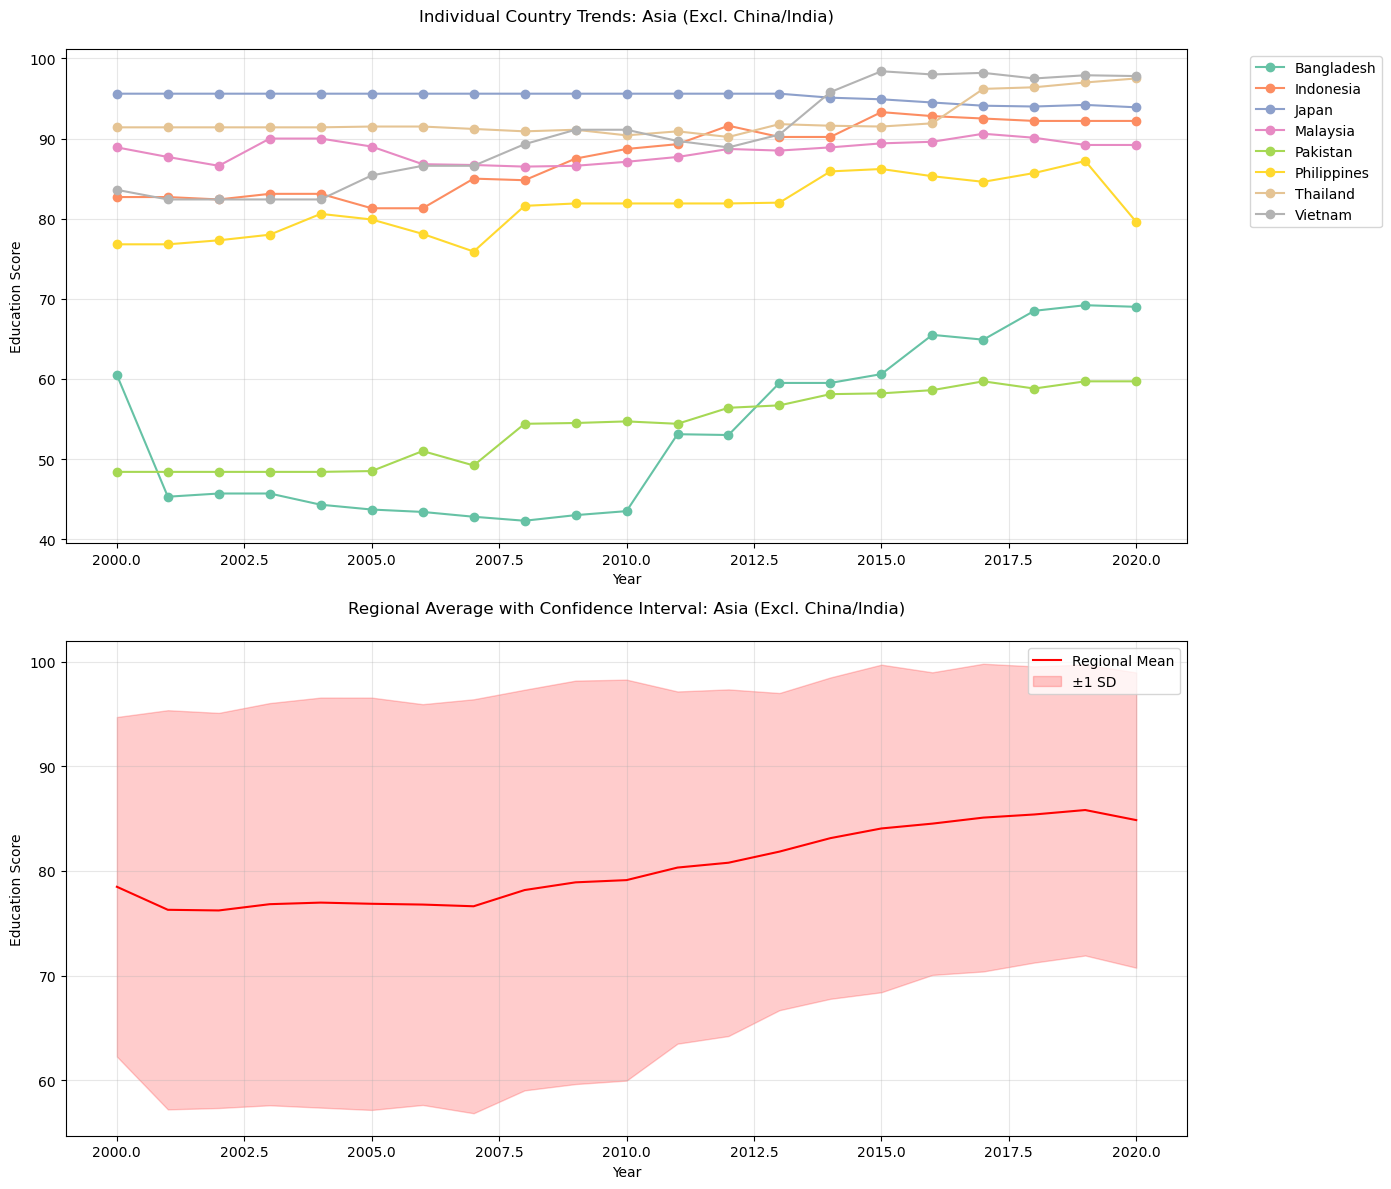

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, norm, kstest
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Define regional groups
REGIONAL_GROUPS = {
    'Asia (Excl. China/India)': [
        'Bangladesh', 'Indonesia', 'Japan', 'Malaysia',
        'Pakistan', 'Philippines', 'Thailand', 'Vietnam'
    ],
    'Europe': [
        'Germany', 'France', 'Italy', 'Spain', 'Sweden',
        'Netherlands', 'Switzerland', 'Norway', 'Denmark'
    ],
    'Americas (Excl. USA)': [
        'Brazil', 'Canada', 'Mexico', 'Argentina', 'Chile', 'Colombia'
    ],
    'Sub-Saharan Africa': [
        'Nigeria', 'South Africa', 'Kenya', 'Ghana', 'Ethiopia', 'Tanzania'
    ],
    'Middle East & North Africa': [
        'Egypt', 'Turkey', 'Iran', 'Saudi Arabia', 'Morocco', 'Algeria'
    ]
}

class EducationAnalyzer:
    def __init__(self, data):
        """Initialize the analyzer with data and verify its structure"""
        self._verify_data_structure(data)
        self.data = data
        self.setup_visualization_style()
    
    def _verify_data_structure(self, data):
        """Verify that the input data has the required columns"""
        required_columns = ['year', 'country', 'goal_4_score']
        missing_columns = [col for col in required_columns if col not in data.columns]
        if missing_columns:
            raise ValueError(f"Missing required columns: {missing_columns}")
    
    def setup_visualization_style(self):
        """Configure basic visualization parameters"""
        self.colors = sns.color_palette("Set2", 8)
        self.fig_size = (14, 8)
        # Set basic matplotlib parameters
        plt.rcParams['figure.figsize'] = self.fig_size
        plt.rcParams['axes.grid'] = True
        plt.rcParams['grid.alpha'] = 0.3
    
    def create_enhanced_timeseries(self, region_name, countries):
        """Enhanced time series visualization with confidence intervals"""
        try:
            region_data = self.data[self.data['country'].isin(countries)]
            if region_data.empty:
                raise ValueError(f"No data found for region: {region_name}")
            
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
            
            # Individual country trends
            for idx, country in enumerate(countries):
                country_data = region_data[region_data['country'] == country]
                ax1.plot(country_data['year'], country_data['goal_4_score'],
                        marker='o', label=country, color=self.colors[idx % len(self.colors)])
            
            ax1.set_title(f'Individual Country Trends: {region_name}', pad=20)
            ax1.set_xlabel('Year')
            ax1.set_ylabel('Education Score')
            ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            ax1.grid(True, alpha=0.3)
            
            # Regional average with confidence interval
            mean_by_year = region_data.groupby('year')['goal_4_score'].agg(['mean', 'std']).reset_index()
            ax2.plot(mean_by_year['year'], mean_by_year['mean'], 'r-', label='Regional Mean')
            ax2.fill_between(mean_by_year['year'],
                           mean_by_year['mean'] - mean_by_year['std'],
                           mean_by_year['mean'] + mean_by_year['std'],
                           alpha=0.2, color='red', label='±1 SD')
            
            ax2.set_title(f'Regional Average with Confidence Interval: {region_name}', pad=20)
            ax2.set_xlabel('Year')
            ax2.set_ylabel('Education Score')
            ax2.legend()
            ax2.grid(True, alpha=0.3)
            
            plt.tight_layout()
            return fig
        
        except Exception as e:
            print(f"Error creating time series visualization for {region_name}: {str(e)}")
            return None

    def create_distribution_analysis(self, region_name, countries):
        """Create distribution analysis visualizations"""
        try:
            region_data = self.data[self.data['country'].isin(countries)]
            if region_data.empty:
                raise ValueError(f"No data found for region: {region_name}")
            
            fig = plt.figure(figsize=(16, 12))
            gs = fig.add_gridspec(2, 2)
            
            # Box plot
            ax1 = fig.add_subplot(gs[0, 0])
            sns.boxplot(data=region_data, y='country', x='goal_4_score', ax=ax1)
            ax1.set_title('Score Distribution by Country')
            
            # Violin plot
            ax2 = fig.add_subplot(gs[0, 1])
            sns.violinplot(data=region_data, y='country', x='goal_4_score', ax=ax2)
            ax2.set_title('Detailed Score Distribution')
            
            # Time trend
            ax3 = fig.add_subplot(gs[1, 0])
            sns.boxplot(data=region_data, x='year', y='goal_4_score', ax=ax3)
            ax3.set_title('Yearly Score Distribution')
            ax3.tick_params(axis='x', rotation=45)
            
            # QQ plot
            ax4 = fig.add_subplot(gs[1, 1])
            stats = region_data.groupby('country')['goal_4_score'].agg(['mean', 'std'])
            theoretical_quantiles = norm.ppf(np.linspace(0.01, 0.99, len(region_data)))
            observed_quantiles = np.sort(region_data['goal_4_score'])
            ax4.scatter(theoretical_quantiles, observed_quantiles)
            ax4.plot([theoretical_quantiles.min(), theoretical_quantiles.max()],
                    [observed_quantiles.min(), observed_quantiles.max()],
                    'r--', label='Reference Line')
            ax4.set_title('Q-Q Plot')
            ax4.legend()
            
            plt.tight_layout()
            return fig
            
        except Exception as e:
            print(f"Error creating distribution analysis for {region_name}: {str(e)}")
            return None

    # [Rest of the methods remain the same]

def analyze_education_data(data_path, regional_groups):
    """Main analysis pipeline with error handling"""
    try:
        print("Loading data...")
        data = pd.read_csv(data_path)
        if data.empty:
            raise ValueError("The loaded data is empty")
        
        print("Initializing analyzer...")
        analyzer = EducationAnalyzer(data)
        
        # Create output directory
        import os
        os.makedirs('analysis_output', exist_ok=True)
        
        # Process each region
        for region_name, countries in regional_groups.items():
            print(f"\nAnalyzing {region_name}...")
            
            try:
                # Generate and save visualizations
                time_series_fig = analyzer.create_enhanced_timeseries(region_name, countries)
                if time_series_fig:
                    time_series_fig.savefig(f'analysis_output/{region_name}_timeseries.png',
                                          bbox_inches='tight', dpi=300)
                    plt.close(time_series_fig)
                
                dist_fig = analyzer.create_distribution_analysis(region_name, countries)
                if dist_fig:
                    dist_fig.savefig(f'analysis_output/{region_name}_distribution.png',
                                   bbox_inches='tight', dpi=300)
                    plt.close(dist_fig)
                
                print(f"Completed analysis for {region_name}")
                
            except Exception as e:
                print(f"Error processing {region_name}: {str(e)}")
                continue
        
        print("\nAnalysis complete. Results saved in 'analysis_output' directory")
        
    except Exception as e:
        print(f"Fatal error in analysis: {str(e)}")
        raise

if __name__ == "__main__":
    data_path = "processed_sdg_data.csv"
    analyze_education_data(data_path, REGIONAL_GROUPS)